# Q1

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def apply(img,se):
    s=1
    temp = np.zeros((img.shape[0]+2,img.shape[1]+2))
    temp[1:img.shape[0]+1,1:img.shape[1]+1] = img[:,:]
    img = temp.copy()
    
    out = np.ones((img.shape[0]-2,img.shape[1]-2))
    
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            temp  = 0# by default foreground
            
            for k in range(se.shape[0]):
                for l in range(se.shape[1]):
                    if se[k,l]==2 or se[k,l]==img[i+k-1,j+l-1]:
                        continue
                    else:
                        temp = 1
                        break
                if temp==1:
                    break
            if temp==0:
                out[i-1,j-1] = 0
            else:
                out[i-1,j-1] = img[i,j]
    return out
def skeletonisation(img):
    br = False
    se1 = np.array([[0,0,0],[2,1,2],[1,1,1]])
    se2 = np.array([[2,0,0],[1,1,0],[2,1,2]])    
    img = img//255
    img = 1 - img
    i = 0
    out1 = img.copy()
    while True:
        if i%2:
            out = apply(out1,se2)
            se2 = np.rot90(se2)
        else:
            out = apply(out1,se1)
            se1 = np.rot90(se1)
        i+=1
        if i%8==0:
            plt.imshow(1 - out,'gray')
            plt.show()
        if np.array_equal(out,out1):
            return out
        
        out1 = out.copy()

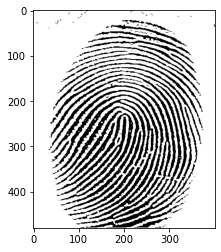

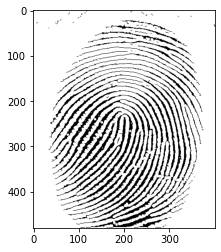

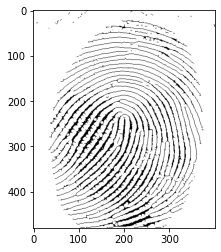

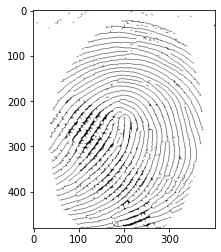

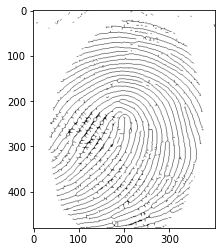

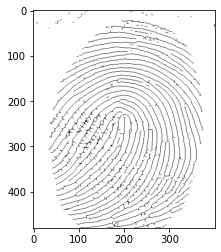

In [3]:
_,img = cv2.threshold(cv2.cvtColor(cv2.imread('../images/thumb_print.jpg'),cv2.COLOR_BGR2GRAY),127,255,cv2.THRESH_BINARY)
out = skeletonisation(img)

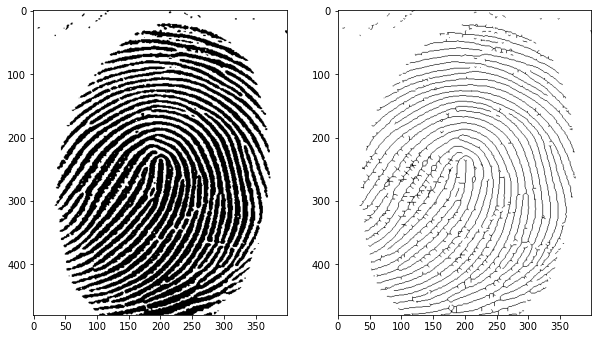

In [4]:
fig = plt.figure()
fig.set_size_inches(10, 10)
fig.add_subplot(121)
plt.imshow(img,'gray')
plt.subplot(1,2,2)
plt.imshow(1 - out,'gray')
plt.show()

### Role of Structuring Element S1 and S2:

These Both Structuring Elements consider all pixels on the boundaries of foreground regions (i.e foreground points that have at least one background neighbor). Delete any such point that has more than one foreground neighbor, as long as doing so does not locally disconnect (i.e split into two) the region containing that pixel. Iterate until convergence.

And all their 90° rotations ( 8 SE's totally ) checking all orientations of boundaries, eroding away the boundaries of foreground objects as much as possible, but do not affecting pixels at the ends of lines.

### Why multiple passes are/may be required

While checking with s1,s2  and all their 90° rotated ones, some pixels are again changed to background, Hence to a new output is got at end of each iteration, so doing we iterate until there is no change in image, as it concludes that further thinning of this image cannot be done (i.e all oriented foreground boundaries have been checked and thinned to produce final skeleton). 

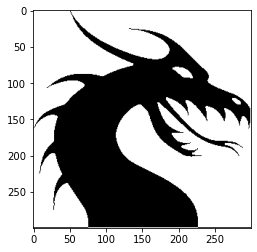

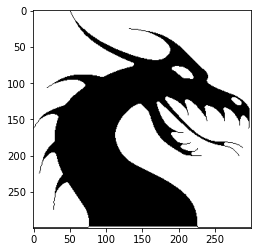

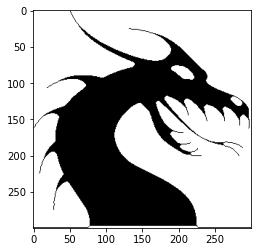

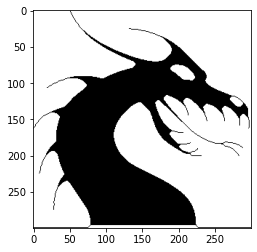

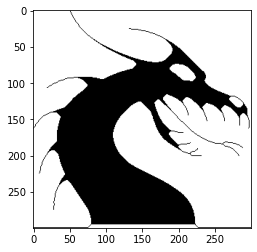

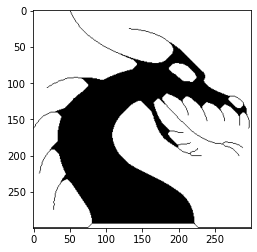

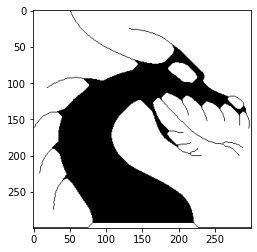

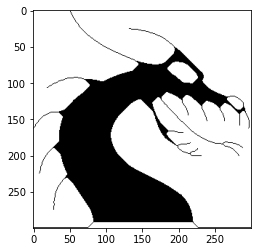

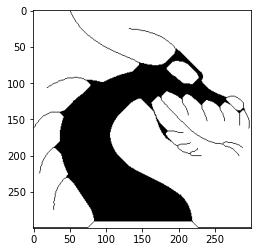

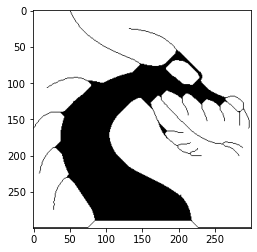

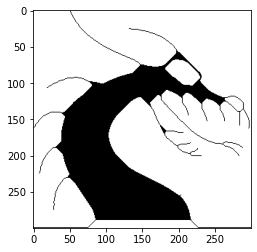

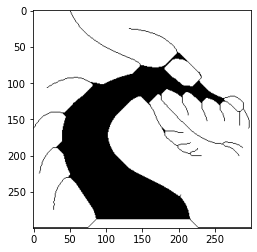

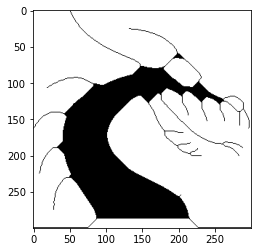

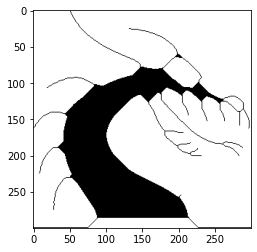

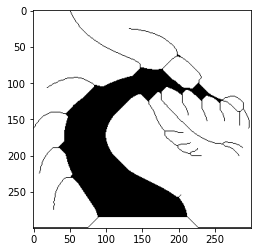

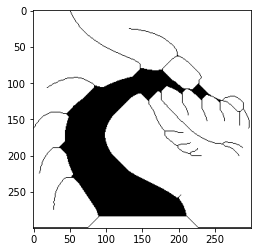

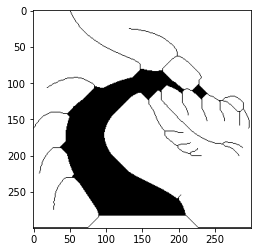

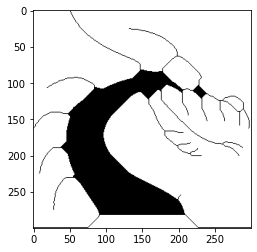

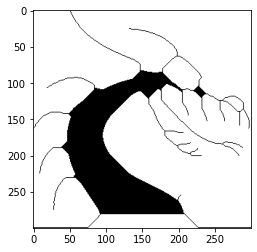

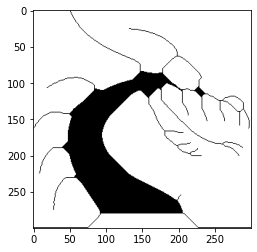

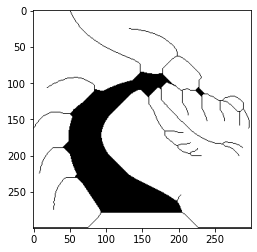

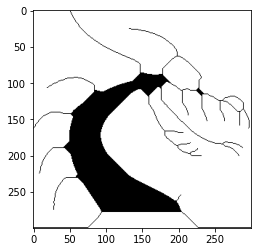

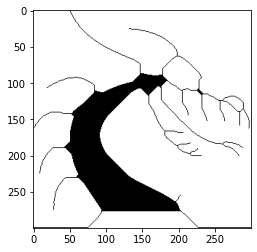

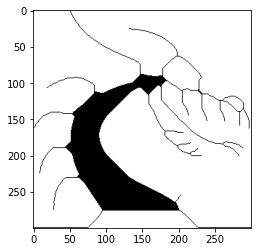

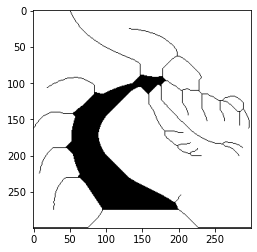

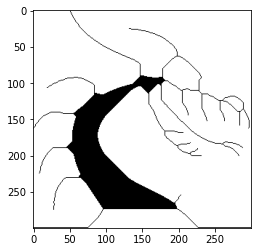

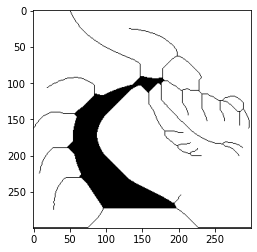

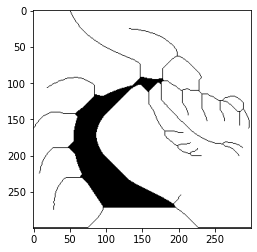

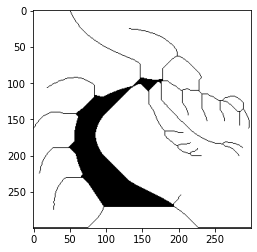

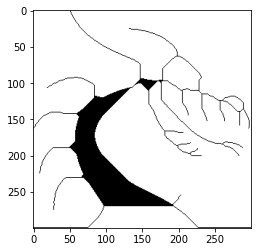

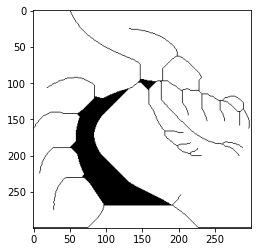

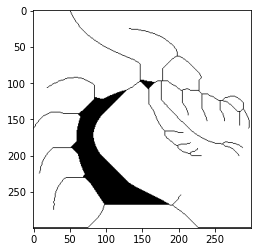

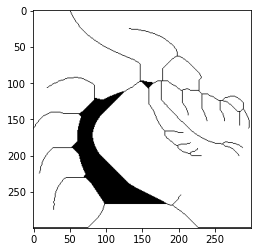

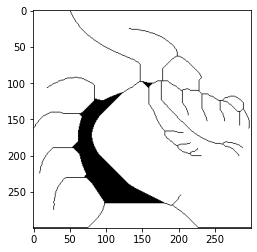

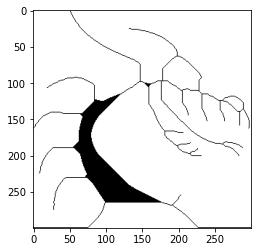

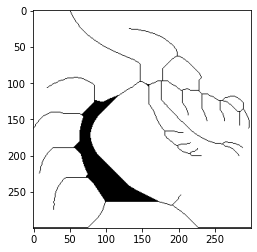

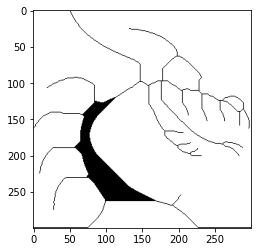

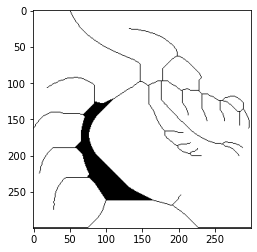

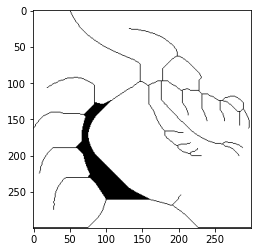

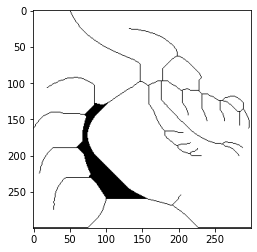

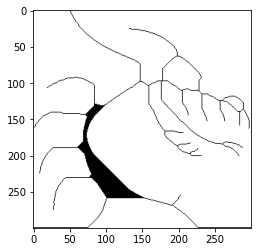

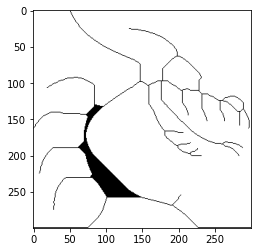

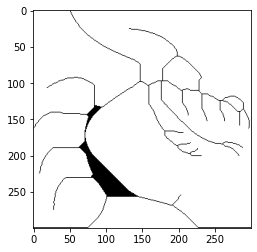

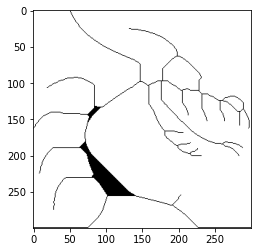

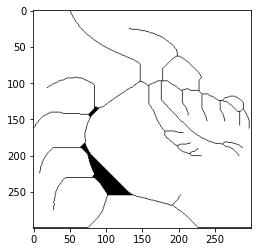

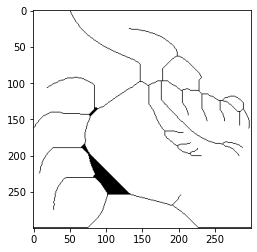

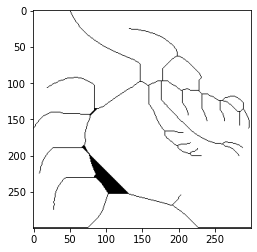

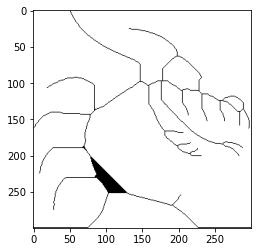

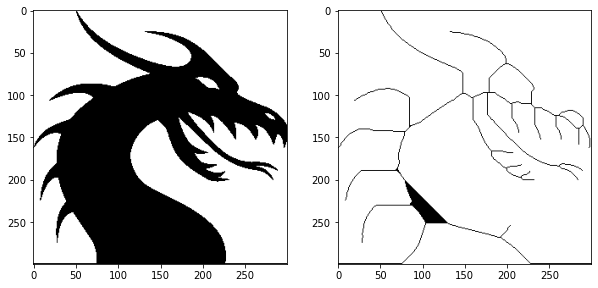

In [8]:
_,img = cv2.threshold(cv2.cvtColor(cv2.imread('../images/dragon.png'),cv2.COLOR_BGR2GRAY),127,255,cv2.THRESH_BINARY)

img = 255- img
out = skeletonisation(img)
fig = plt.figure()
fig.set_size_inches(10, 10)
fig.add_subplot(121)
plt.imshow(img,'gray')
plt.subplot(1,2,2)
plt.imshow(1 - out,'gray')
plt.show()

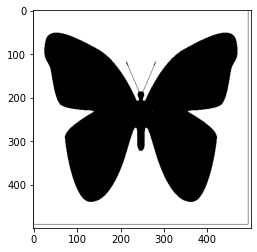

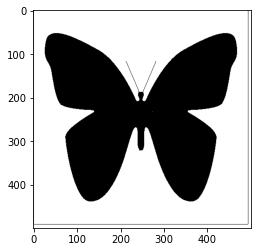

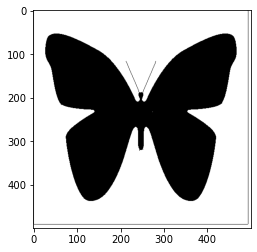

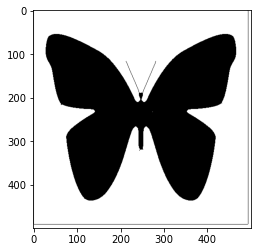

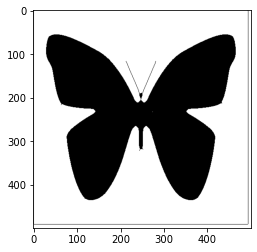

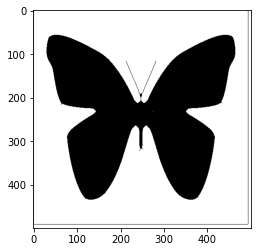

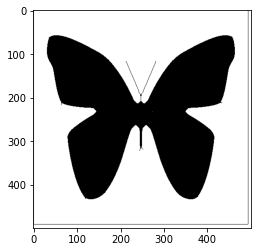

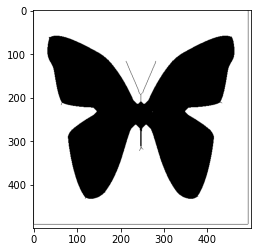

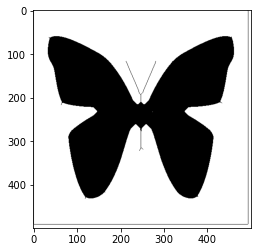

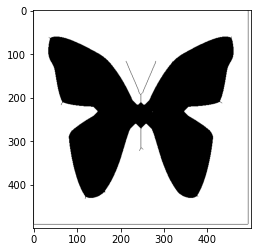

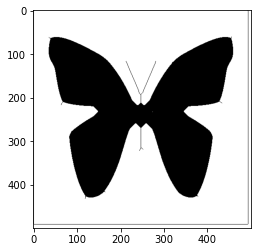

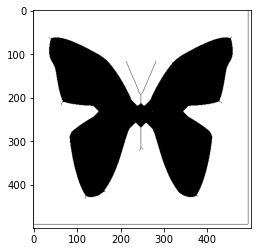

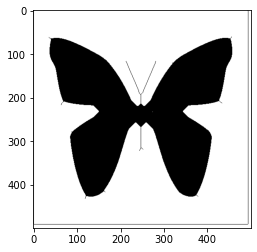

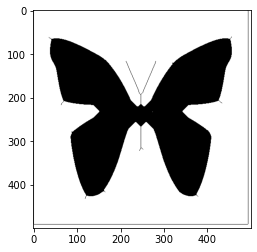

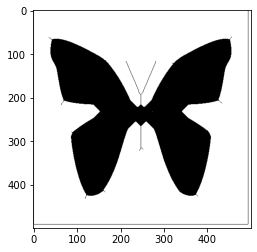

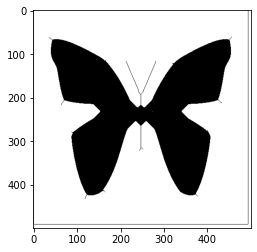

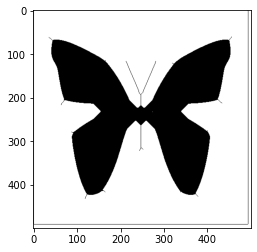

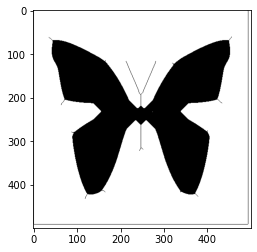

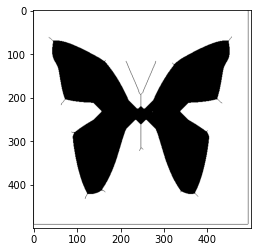

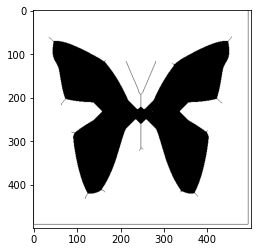

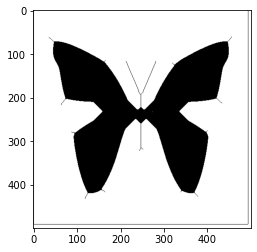

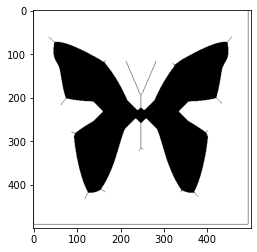

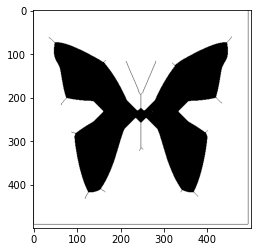

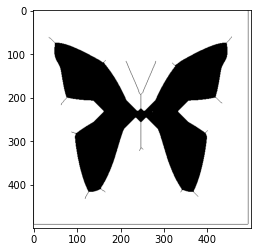

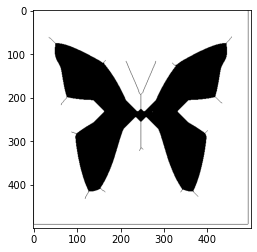

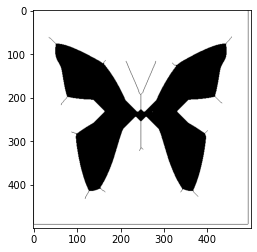

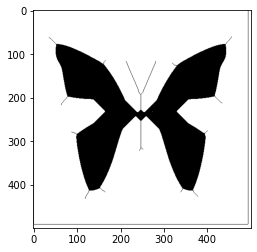

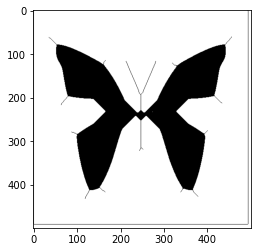

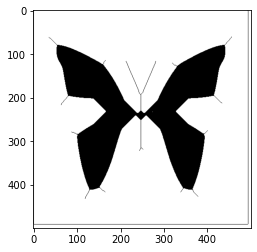

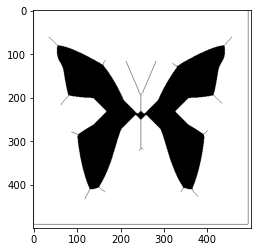

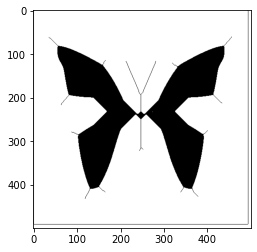

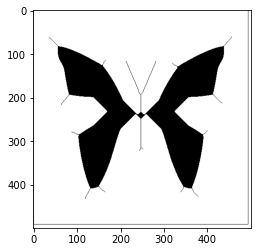

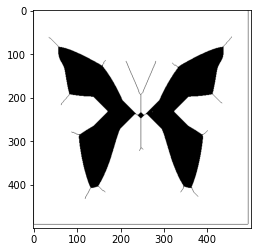

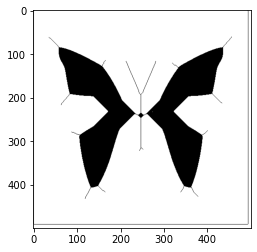

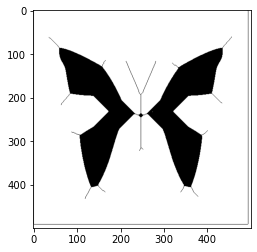

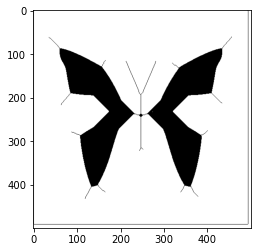

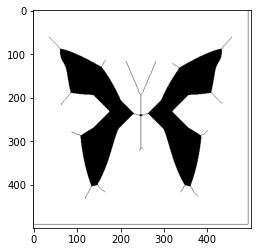

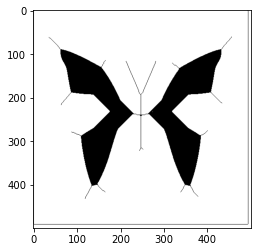

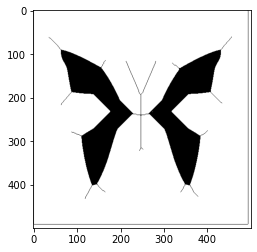

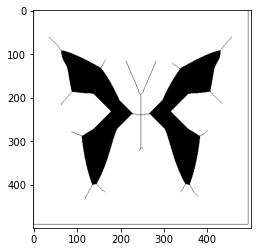

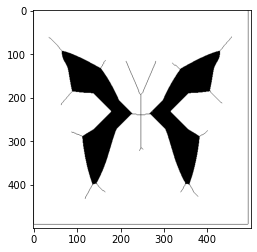

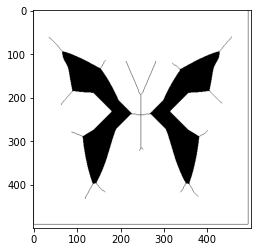

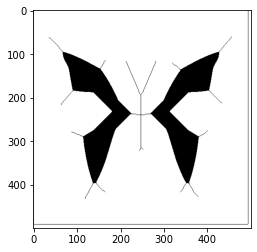

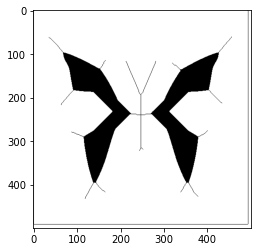

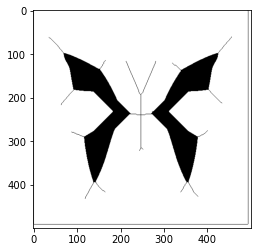

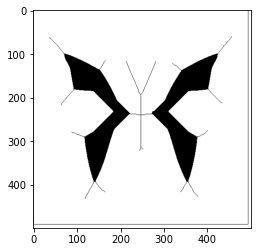

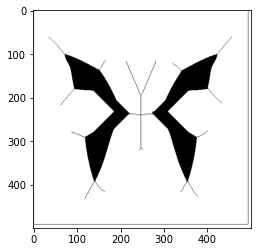

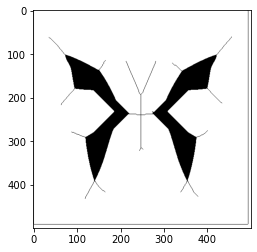

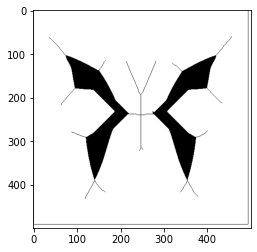

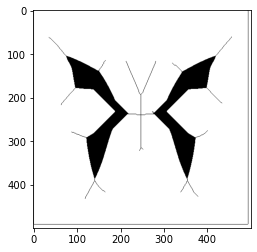

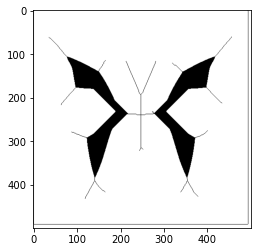

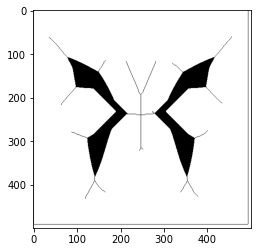

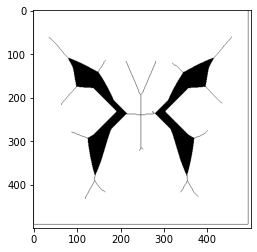

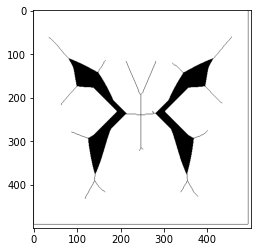

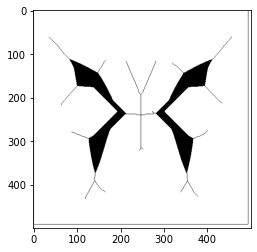

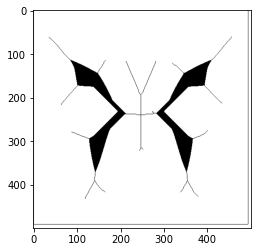

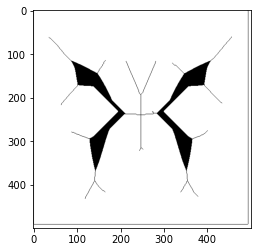

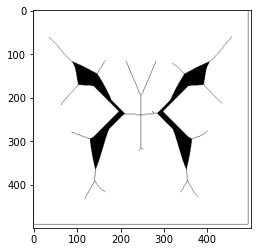

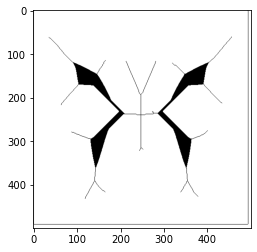

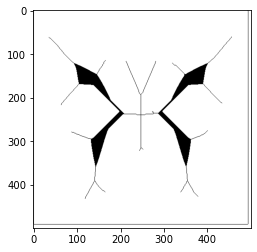

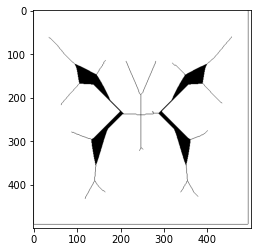

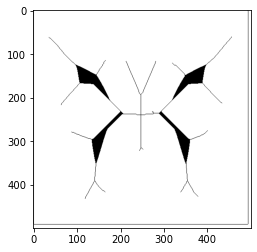

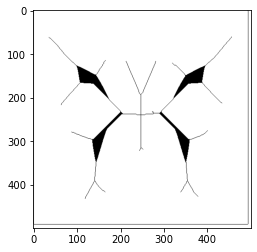

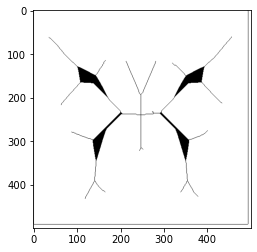

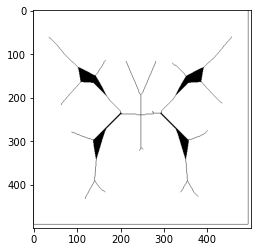

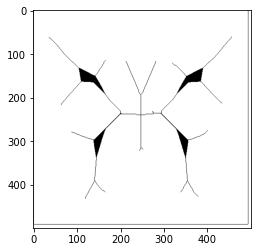

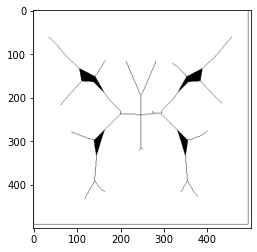

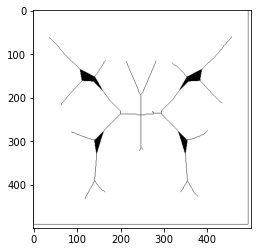

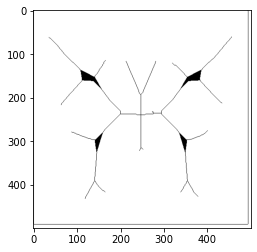

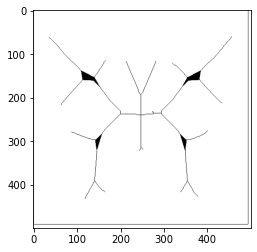

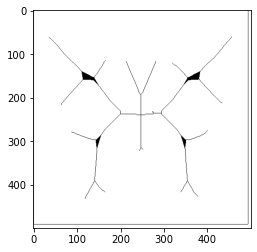

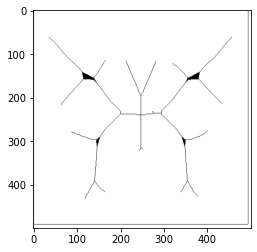

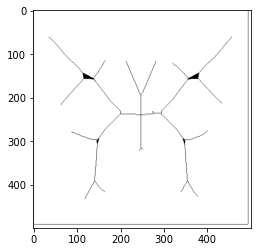

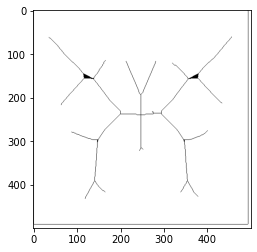

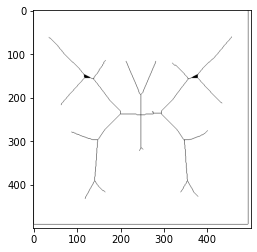

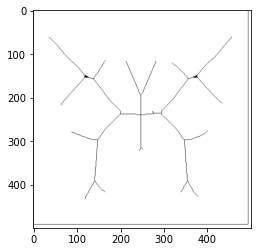

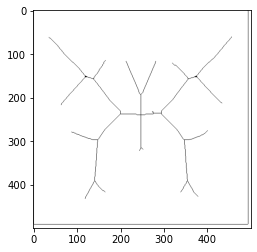

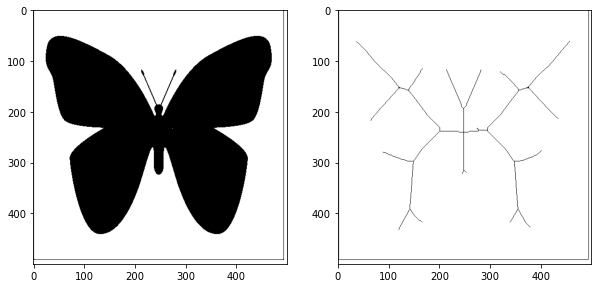

In [9]:
_,img = cv2.threshold(cv2.cvtColor(cv2.imread('../images/butterfly.jpg'),cv2.COLOR_BGR2GRAY),127,255,cv2.THRESH_BINARY)
img = 255 - img #to make object black
out = skeletonisation(img)
fig = plt.figure()
fig.set_size_inches(10, 10)
fig.add_subplot(121)
plt.imshow(img,'gray')
plt.subplot(1,2,2)
plt.imshow(1 - out,'gray')
plt.show()

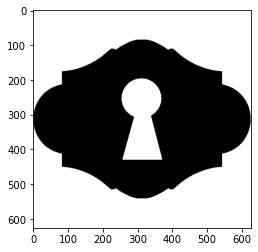

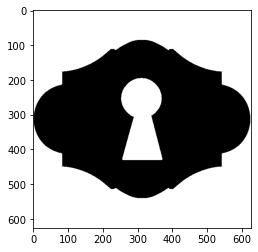

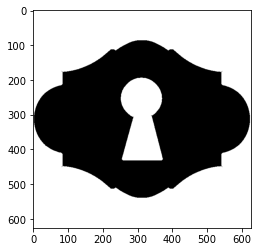

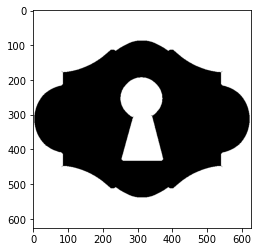

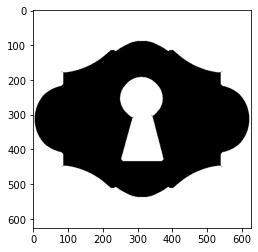

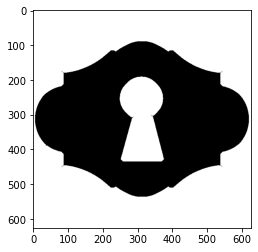

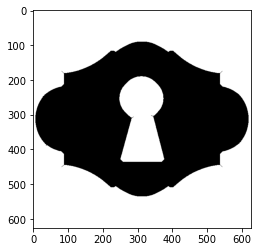

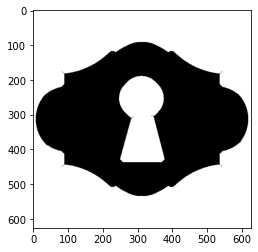

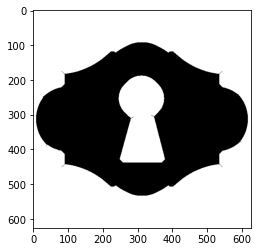

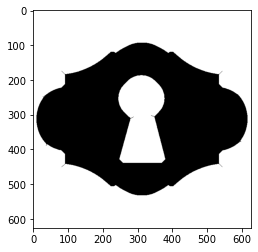

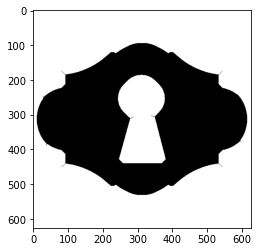

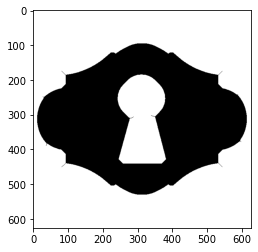

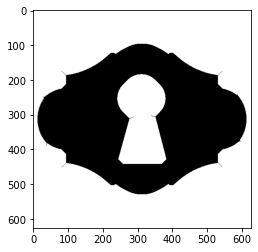

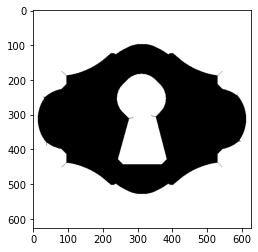

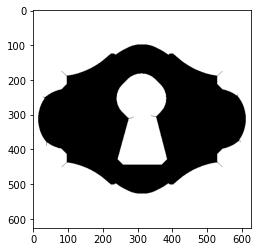

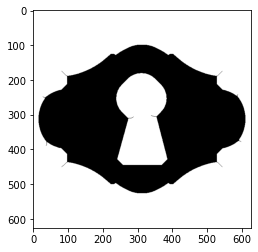

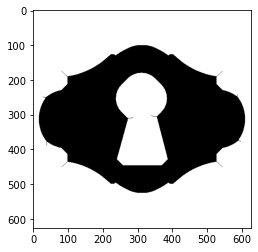

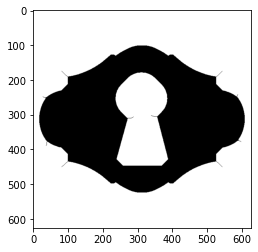

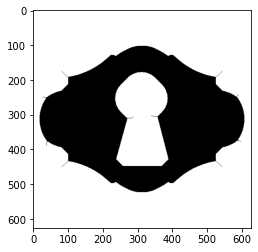

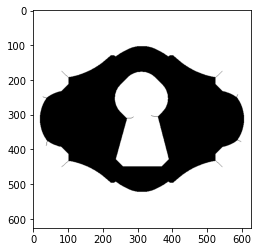

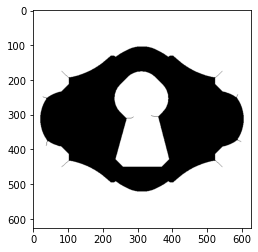

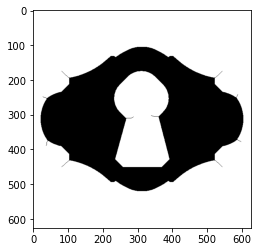

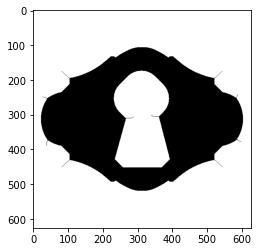

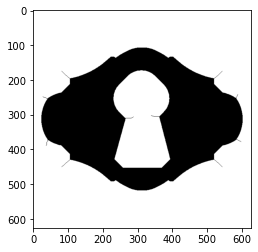

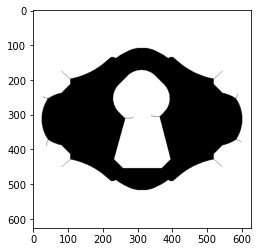

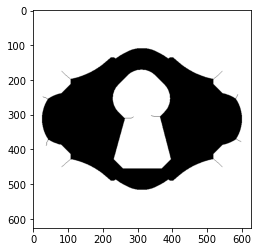

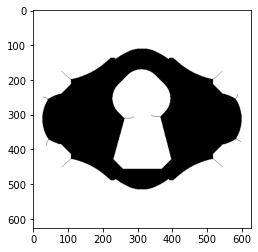

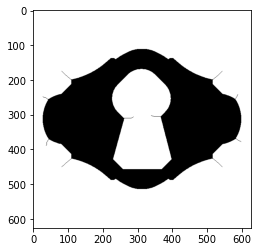

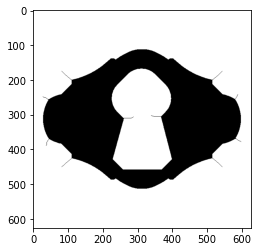

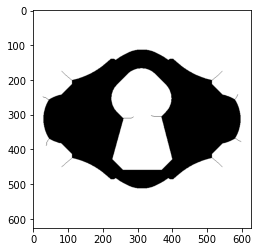

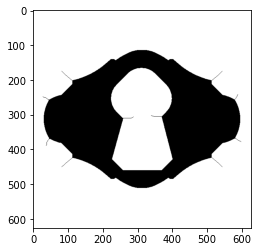

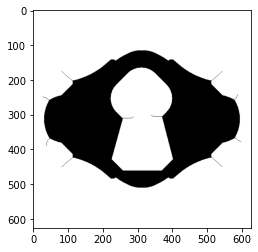

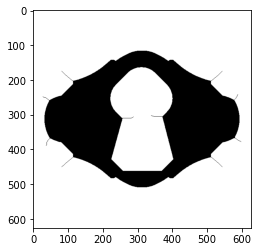

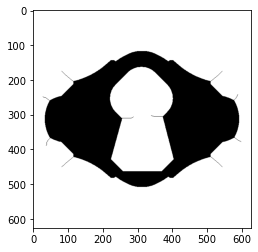

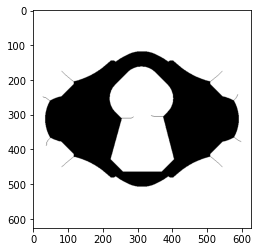

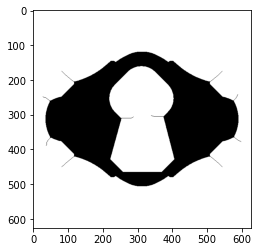

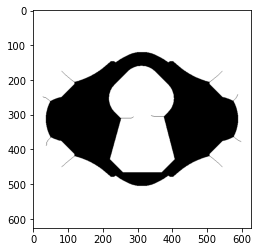

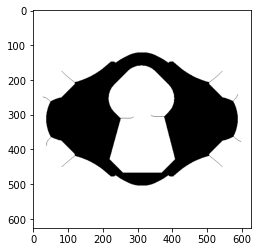

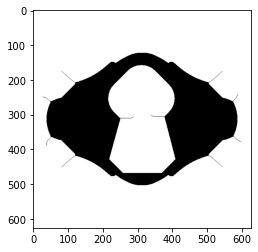

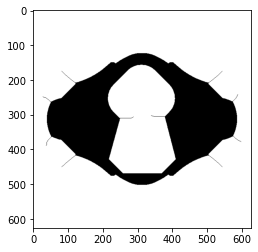

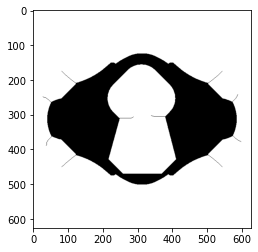

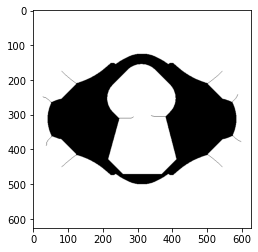

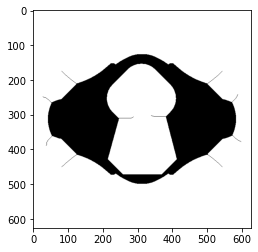

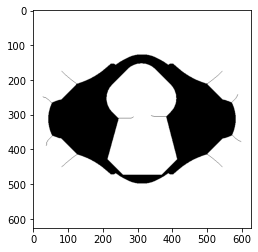

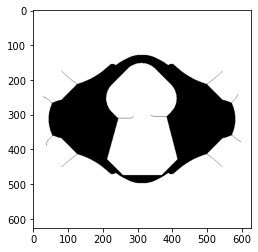

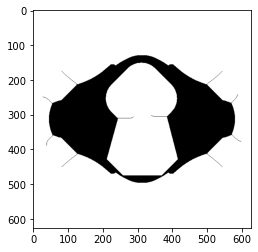

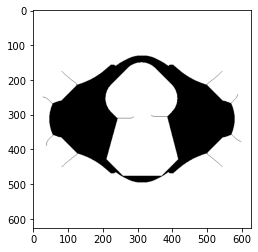

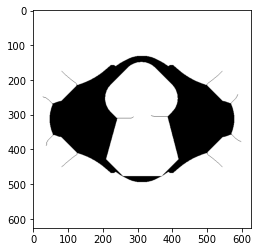

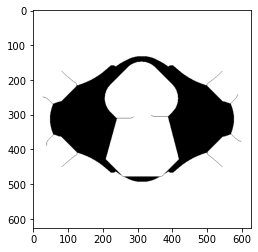

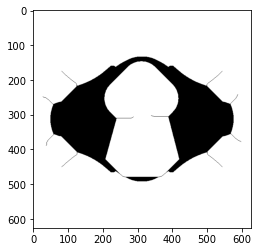

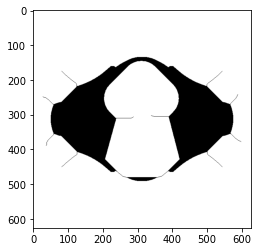

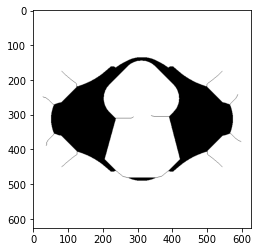

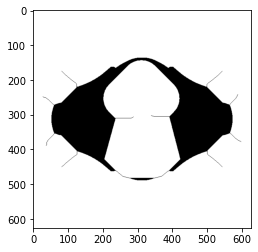

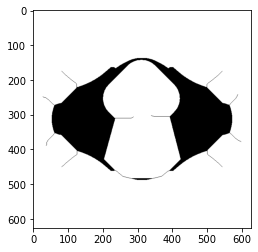

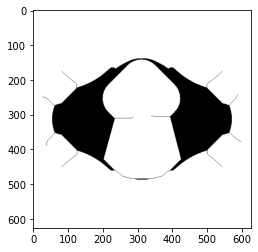

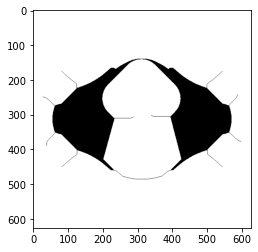

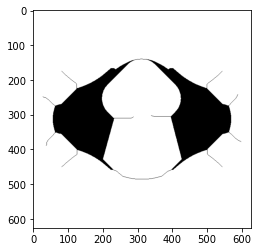

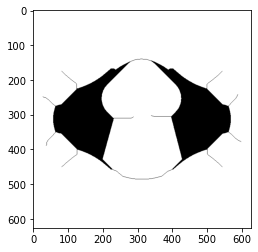

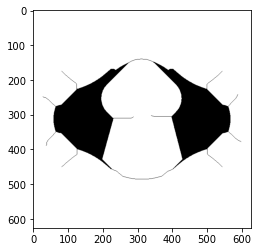

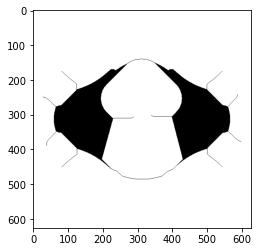

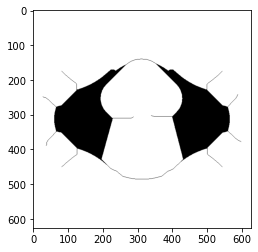

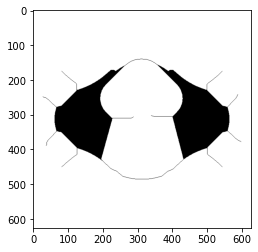

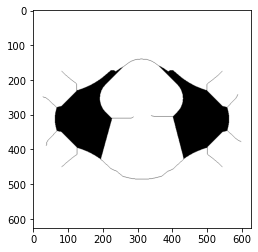

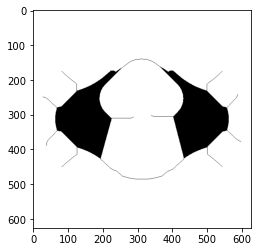

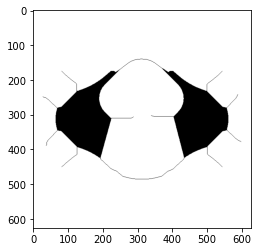

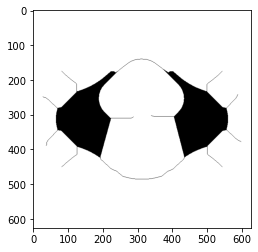

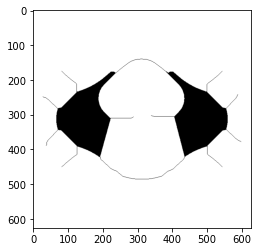

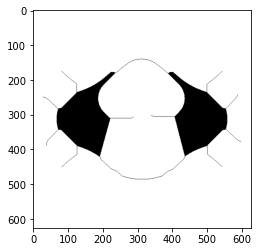

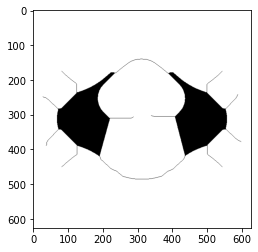

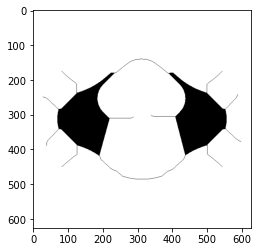

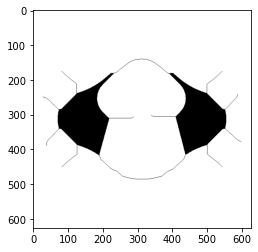

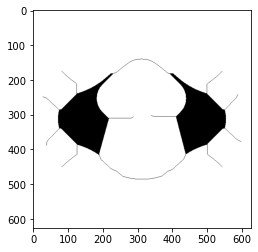

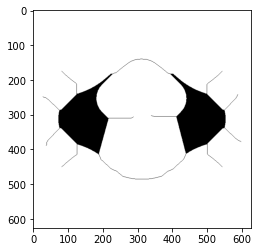

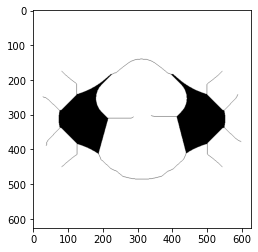

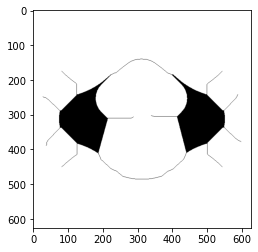

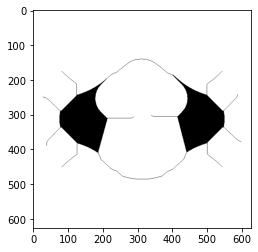

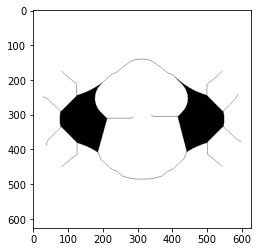

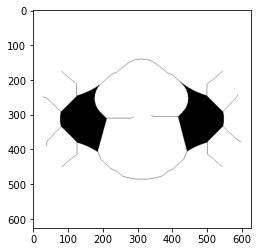

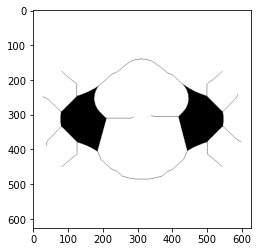

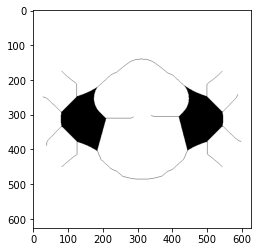

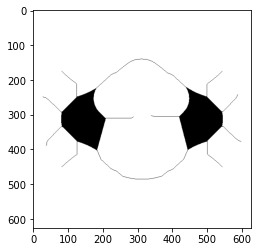

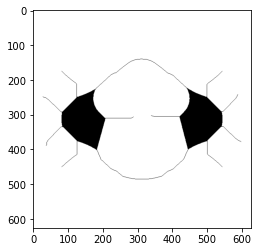

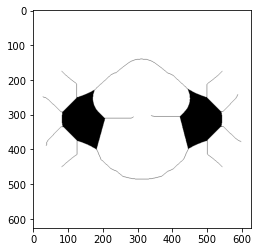

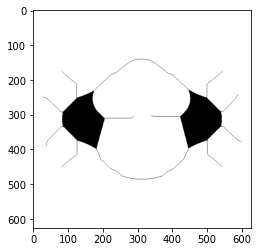

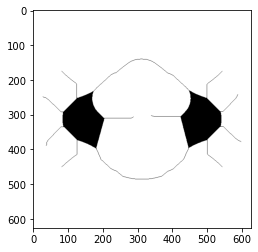

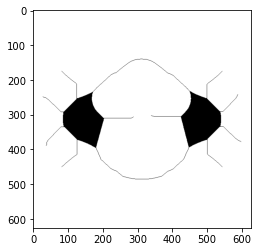

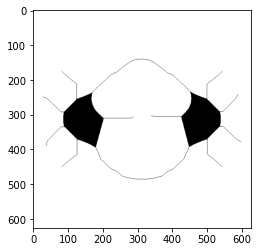

KeyboardInterrupt: 

In [10]:
_,img = cv2.threshold(cv2.cvtColor(cv2.imread('../images/keyhole.jpg'),cv2.COLOR_BGR2GRAY),127,255,cv2.THRESH_BINARY)
img = 255 - img #to make object black
out = skeletonisation(img)
fig = plt.figure()
fig.set_size_inches(10, 10)
fig.add_subplot(121)
plt.imshow(img,'gray')
plt.subplot(1,2,2)
plt.imshow(1 - out,'gray')
plt.show()